In [ ]:
# Copyright 2025 Google LLC
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
# python3 base env

# Imagen 3 Image Editing for Samsung VD

| Author |
| --- |
| jooneun@google.com |

## Overview

### Imagen 4

Imagen 3 on Vertex AI brings Google's state of the art generative AI capabilities to application developers. Imagen 3 is Google's highest quality text-to-image model to date. It's capable of creating images with astonishing detail. Thus, developers have more control when building next-generation AI products that transform their imagination into high quality visual assets. Learn more about [Imagen on Vertex AI](https://cloud.google.com/vertex-ai/generative-ai/docs/image/overview).


Change Image Style
- Style Change

In [26]:
import os
from google import genai

PROJECT_ID = "jc-gcp-project"  # @param {type: "string", placeholder: "[your-project-id]", isTemplate: true}
if not PROJECT_ID or PROJECT_ID == "[your-project-id]":
    PROJECT_ID = str(os.environ.get("GOOGLE_CLOUD_PROJECT"))

LOCATION = os.environ.get("GOOGLE_CLOUD_REGION", "us-central1")

client = genai.Client(vertexai=True, project=PROJECT_ID, location=LOCATION)

In [52]:
from google.cloud import storage
from IPython.display import display, HTML
from IPython.display import Image as Image_01

# GCS URI를 파싱하여 버킷 이름과 파일 경로(blob)를 분리하는 함수
def get_bucket_and_blob_names(gcs_uri):
    """GCS URI에서 버킷과 블롭 이름을 추출합니다."""
    # "gs://" 접두사 제거
    path = gcs_uri.replace("gs://", "")
    # 첫 번째 '/'를 기준으로 버킷 이름과 파일 경로 분리
    parts = path.split('/', 1)
    bucket_name = parts[0]
    blob_name = parts[1] if len(parts) > 1 else None
    return bucket_name, blob_name

# GCS 이미지를 노트북에 표시하는 함수
def display_gcs_image(gcs_uri):
    """GCS URI로부터 이미지를 다운로드하여 Jupyter Notebook에 표시합니다."""
    try:
        storage_client = storage.Client()
        bucket_name, blob_name = get_bucket_and_blob_names(gcs_uri)
        
        bucket = storage_client.bucket(bucket_name)
        blob = bucket.blob(blob_name)
        
        # 이미지를 바이트 데이터로 다운로드
        image_data = blob.download_as_bytes()
        
        # 이미지 표시
        display(Image_01(data=image_data, width=400)) # 이미지 크기 조절 가능
        print(f"✅ 이미지 로드 성공: {gcs_uri}")
        
    except Exception as e:
        print(f"❌ 이미지 로드 실패: {gcs_uri}\n오류: {e}")
# 두 개의 GCS 이미지를 양쪽으로 표시하는 함수

def download_gcs_image(gcs_uri):
    """GCS URI로부터 이미지를 바이트 데이터로 다운로드합니다."""
    try:
        storage_client = storage.Client()
        bucket_name, blob_name = get_bucket_and_blob_names(gcs_uri)

        if bucket_name and blob_name:
            bucket = storage_client.bucket(bucket_name)
            blob = bucket.blob(blob_name)
            image_data = blob.download_as_bytes()
            return image_data, f"✅ 이미지 로드 성공: {gcs_uri}"
        else:
            return None, f"❌ 잘못된 GCS URI 형식: {gcs_uri}"
    except Exception as e:
        return None, f"❌ 이미지 로드 실패: {gcs_uri}\n오류: {e}"
    
    
def display_two_gcs_images(gcs_uri_left, gcs_uri_right, width=400):
    """두 개의 GCS URI로부터 이미지를 다운로드하여 Jupyter Notebook에 양쪽으로 표시합니다."""
    image_data_left, status_left = download_gcs_image(gcs_uri_left)
    image_data_right, status_right = download_gcs_image(gcs_uri_right)

    html = "<div style='display: flex; flex-direction: row;'>"
    if image_data_left:
        html += f"<div style='margin-right: 10px;'><strong>이전:</strong><br><img src='data:image/jpeg;base64,{base64.b64encode(image_data_left).decode()}' width='{width}'></div>"
    else:
        html += f"<div style='margin-right: 10px;'>{status_left}</div>"

    if image_data_right:
        html += f"<div><strong>이후:</strong><br><img src='data:image/jpeg;base64,{base64.b64encode(image_data_right).decode()}' width='{width}'></div>"
    else:
        html += f"<div>{status_right}</div>"
    html += "</div>"

    display(HTML(html))
    print(status_left)
    print(status_right)

In [37]:
from google import genai
from google.genai import types
import base64

style = "PIXAR"
img_uri = "gs://cloud-samples-data/generative-ai/image/person.png"

def generate(style, img_uri):
    client = genai.Client(
        vertexai=True,
        project="jc-gcp-project",
        location="global",
    )

    image1 = types.Part.from_uri(
        file_uri=img_uri,
        mime_type="image/jpeg",
    )
    si_text1 = f"""당신은 이미지 설명가 입니다. 
Imagen4를 이용해서 첨부된 이미지와 완전히 동일한 이미지를 생성할 수 있도록, 이미지를 영어로 아주 상세하게 서술하시오.
사람 생김새, 전체 사람 수, 서로간의 위치등 정확하게 이미지를 똑같이 생성할 수 있어야 합니다.
영어로 답변하세요.
"""

    model = "gemini-2.5-pro"
    contents = [
        types.Content(
            role="user",
            parts=[
                image1,
                types.Part.from_text(text=f"""Imagen4를 이용해서 위의 이미지와 완전히 동일한 이미지를 생성할거야. 
Imagen4 프롬프트에 쓸 수 있게, 아주 상세하게 이미지를 묘사해줘. 동일하지만 이미지 스타일은 {style}스타일로 그려질 수 있게 설명하세요.""")
            ]
        )
    ]

    generate_content_config = types.GenerateContentConfig(
        temperature = 1,
        top_p = 1,
        seed = 0,
        max_output_tokens = 8192,
        safety_settings = [types.SafetySetting(
            category="HARM_CATEGORY_HATE_SPEECH",
            threshold="OFF"
        ),types.SafetySetting(
            category="HARM_CATEGORY_DANGEROUS_CONTENT",
            threshold="OFF"
        ),types.SafetySetting(
            category="HARM_CATEGORY_SEXUALLY_EXPLICIT",
            threshold="OFF"
        ),types.SafetySetting(
            category="HARM_CATEGORY_HARASSMENT",
            threshold="OFF"
        )],
        system_instruction=[types.Part.from_text(text=si_text1)],
        thinking_config=types.ThinkingConfig(
            thinking_budget=-1,
        ),
    )

    # for chunk in client.models.generate_content_stream(
    #     model = model,
    #     contents = contents,
    #     config = generate_content_config,
    # ):
    #     print(chunk.text, end="")

    # generate_content()를 호출, 전체 응답을 한 번에 받기
    response = client.models.generate_content(
        model=model,
        contents=contents,
        config=generate_content_config,
    )

    # 2. 응답 객체의 .text 속성으로 바로 최종 결과 텍스트를 반환합니다.
    return response.text

In [38]:
style = "PIXAR"
img_uri = "gs://cloud-samples-data/generative-ai/image/person.png"

In [39]:
result_1 = generate(style, img_uri)

In [42]:
generation_model = "imagen-4.0-generate-preview-06-06"
generation_model_fast = "imagen-4.0-fast-generate-preview-06-06"
generation_model_ultra = "imagen-4.0-ultra-generate-preview-06-06"

In [45]:
print(image.generated_images[0].image.gcs_uri)


gs://jc-test-dataset/sample_img/1752477811809/sample_0.png


In [48]:
prompt = result_1
output_gcs_uri = "gs://jc-test-dataset/sample_img"
image = client.models.generate_images(
    model=generation_model,
    prompt=prompt,
    config=types.GenerateImagesConfig(
        aspect_ratio="1:1",
        number_of_images=1,
        safety_filter_level="BLOCK_MEDIUM_AND_ABOVE",
        person_generation="ALLOW_ADULT",
        output_gcs_uri=output_gcs_uri,
    ),
)
changed_img = image.generated_images[0].image.gcs_uri
print(changed_img)

gs://jc-test-dataset/sample_img/1752477968620/sample_0.png



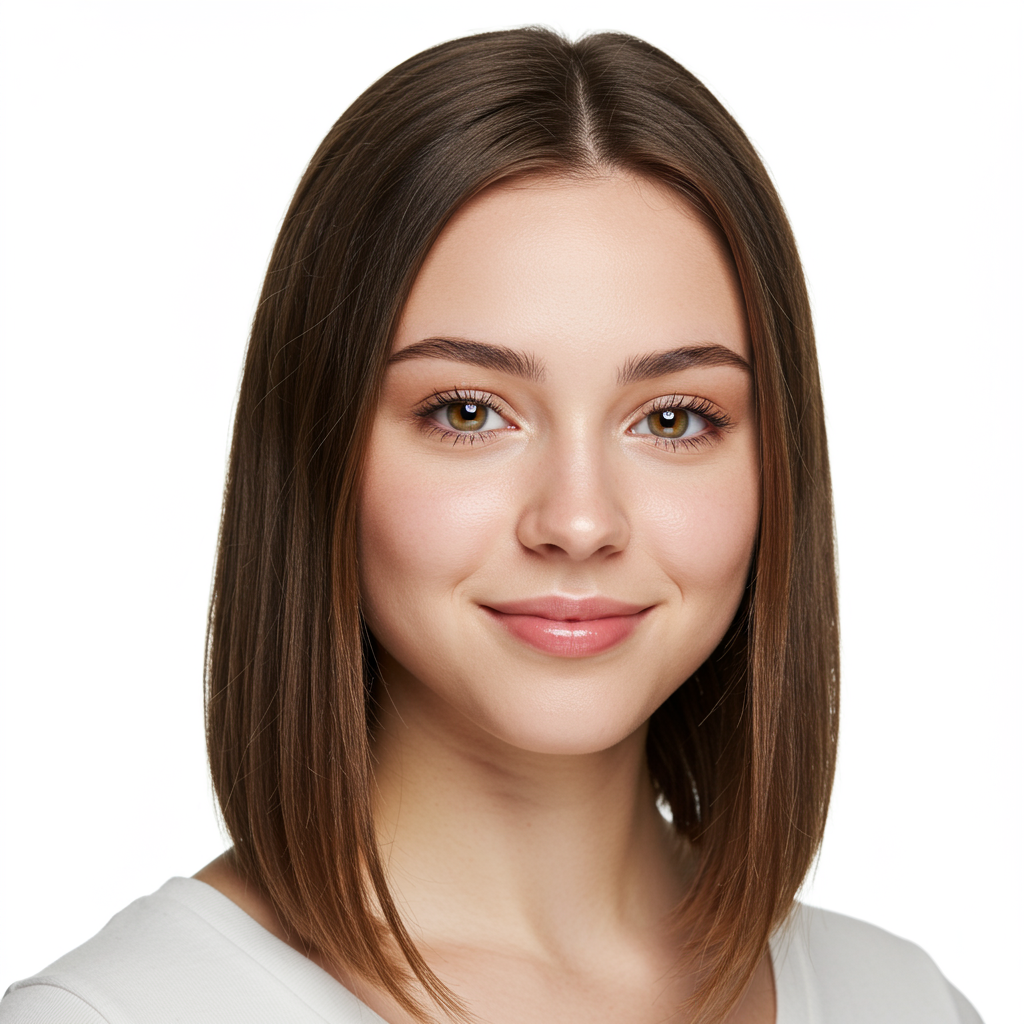
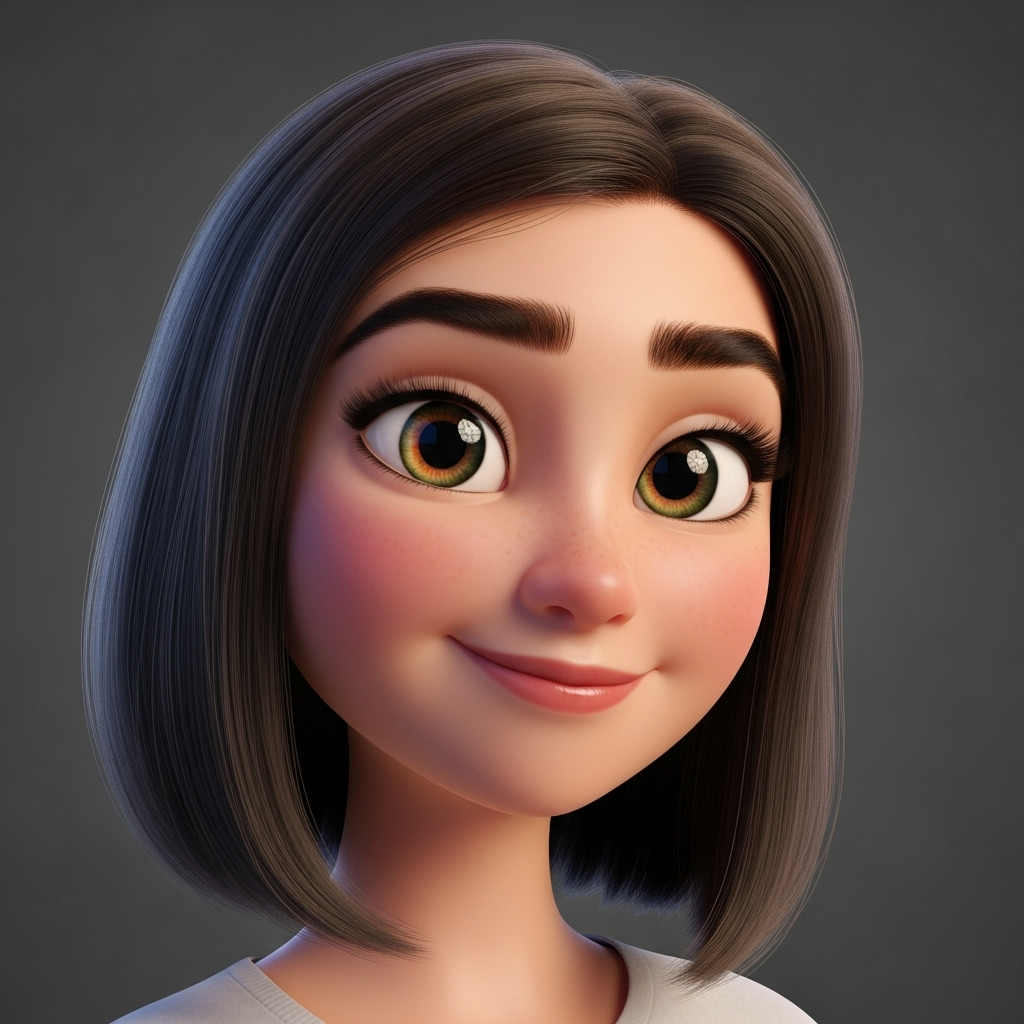

✅ 이미지 로드 성공: gs://cloud-samples-data/generative-ai/image/person.png
✅ 이미지 로드 성공: gs://jc-test-dataset/sample_img/1752477968620/sample_0.png


In [53]:
display_two_gcs_images(img_uri, changed_img)